In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


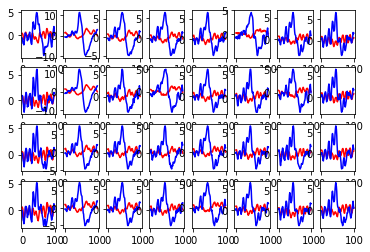

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Tue Apr 12 17:50:26 2022

@author: minho
"""


import scipy.io
import numpy as np
import tensorflow as tf
import keras 
from keras import layers
import pandas as pd

from keras.callbacks import TensorBoard     
import matplotlib.pyplot as plt

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as my_LDA
import sklearn

mat = scipy.io.loadmat('drive/MyDrive/Dot_train.mat')
mat2 = scipy.io.loadmat('drive/MyDrive/Dot_train_Y.mat')


Train = np.array(mat.get('Dot_train')) # X
Tra_Y = mat2.get('Dot_train_Y') # Y


sub = 5
idx_NT = np.where(Tra_Y[sub,:] == 1)
idx_PA = np.where(Tra_Y[sub,:] == 3)
Tra_NT = np.squeeze(Train[idx_NT,:,0:100,sub])
Tra_PA = np.squeeze(Train[idx_PA,:,0:100,sub])

# Draw average ERP responses

mnC1 = np.mean(Tra_NT, 0)
mnC2 = np.mean(Tra_PA, 0)

fig, axs = plt.subplots(4,8)
for i in range(8):
  for j in range(4):
    k = (i - 1) * 4 + j
    axs[j, i].plot(mnC1[k,:],'r')
    axs[j, i].plot(mnC2[k,:],'b')


Ntm = np.ones([2800, 32, 10])
Atm = np.ones([280, 32, 10])

# Jumping mean average feature : concat over the channel dim
j=0
for i in range(0, 100, 10):    
    Ntm[:,:,j] = np.mean(Tra_NT[:,:,list(range(i,i+10))], axis=2)
    Atm[:,:,j] = np.mean(Tra_PA[:,:,list(range(i,i+10))], axis=2)
    j += 1

Ntm = Ntm.reshape((2800, 320), order = 'C')
Atm = Atm.reshape((280, 320), order = 'C')
            
ft_tra_NT = Ntm
ft_tra_AC = Atm

Y = np.concatenate((np.ones(len(ft_tra_NT)), np.ones(len(ft_tra_AC))+1))
clf = my_LDA()
clf.fit(np.concatenate((ft_tra_NT, ft_tra_AC), axis = 0), Y)


# Test dataset
mat = scipy.io.loadmat('drive/MyDrive/Dot_test.mat')
mat2 = scipy.io.loadmat('drive/MyDrive/Dot_test_Y.mat')

Test = np.array(mat.get('Dot_test'))
Test_Y = mat2.get('Dot_test_Y') 

idx_NT = np.where(Test_Y[sub,:] == 1)
idx_PA = np.where(Test_Y[sub,:] == 3)
Test_NT = np.squeeze(Test[idx_NT,:,0:100,sub])
Test_PA = np.squeeze(Test[idx_PA,:,0:100,sub])

Ntm = np.ones([3200, 32, 10])
Atm = np.ones([320, 32, 10])

j=0
for i in range(0, 100, 10):    
    Ntm[:,:,j] = np.mean(Test_NT[:,:,list(range(i,i+10))], axis=2)
    Atm[:,:,j] = np.mean(Test_PA[:,:,list(range(i,i+10))], axis=2)
    j += 1

Ntm = Ntm.reshape((3200, 320), order = 'C')  #c1
Atm = Atm.reshape((320, 320), order = 'C')   #c2

Test_all = np.concatenate([Ntm, Atm], axis = 0)
out = clf.predict(Test_all)

# Task: create confusion matrix, calculate AUC score


